# Inciso 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, mean_squared_error


# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_nb_reg = GaussianNB()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_nb_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-scores.mean())
print(f"RMSE con Validación Cruzada: {rmse_cv}")

RMSE con Validación Cruzada: 47118.09272925503


# Inciso 9

#### modelo de clasificacion

✅ Dataset cargado con éxito.

🔹 Distribución de la variable de respuesta:
Precio_Categorizado
Media     490
Barata    487
Cara      483
Name: count, dtype: int64

🔹 Columnas categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
🔹 Columnas numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFin

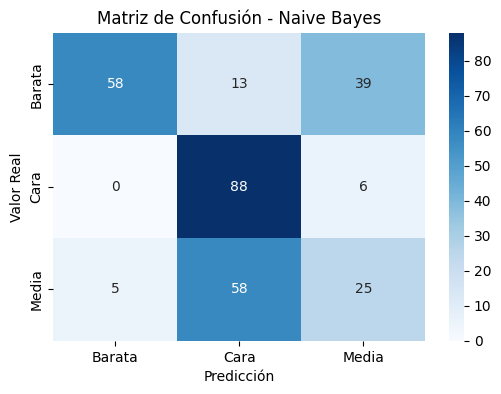

In [6]:
# 🔹 Importar librerías necesarias
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 1. Cargar el dataset
file_path = "../dataset/train.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {file_path}.")

df = pd.read_csv(file_path)
print("✅ Dataset cargado con éxito.")

# 🔹 2. Crear variable categórica 'Precio_Categorizado' si no existe
if "Precio_Categorizado" not in df.columns:
    df["Precio_Categorizado"] = pd.qcut(df["SalePrice"], q=3, labels=["Barata", "Media", "Cara"])

print("\n🔹 Distribución de la variable de respuesta:")
print(df["Precio_Categorizado"].value_counts())

# 🔹 3. Identificar variables categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).drop(columns=["SalePrice"]).columns.tolist()

print("\n🔹 Columnas categóricas:", categorical_cols)
print("🔹 Columnas numéricas:", numeric_cols)

# 🔹 4. Convertir variables categóricas a numéricas con One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(df[categorical_cols])
X_categorical = pd.DataFrame(X_categorical)

# 🔹 5. Normalización de variables numéricas
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[numeric_cols])
X_numeric = pd.DataFrame(X_numeric)

# 🔹 6. Crear la matriz final de características
X_final = pd.concat([X_numeric, X_categorical], axis=1)

# 🔹 7. Manejo de valores nulos antes de entrenar el modelo
X_final.fillna(X_final.median(numeric_only=True), inplace=True)  # Reemplazar NaN en numéricas
X_final.fillna("None", inplace=True)  # Reemplazar NaN en categóricas

# 🔹 8. Convertir la variable de respuesta a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Precio_Categorizado"])

# 🔹 9. División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 🔹 10. Verificar si todavía hay NaN en los datos
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    raise ValueError("❌ Todavía hay NaN en los datos después de la limpieza.")

# 🔹 11. Entrenar modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 🔹 12. Hacer predicciones
y_pred = nb_model.predict(X_test)

# 🔹 13. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\n📊 Evaluación del Modelo de Clasificación Naive Bayes:\nExactitud: {accuracy:.4f}")
print("\n🔹 Matriz de Confusión:\n", conf_matrix)
print("\n🔹 Reporte de Clasificación:\n", class_report)

# 🔹 14. Graficar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


#### regresion usando bayes

RMSE con Validación Cruzada: 47118.09272925503
RMSE: 53380.67
R² Score: 0.63


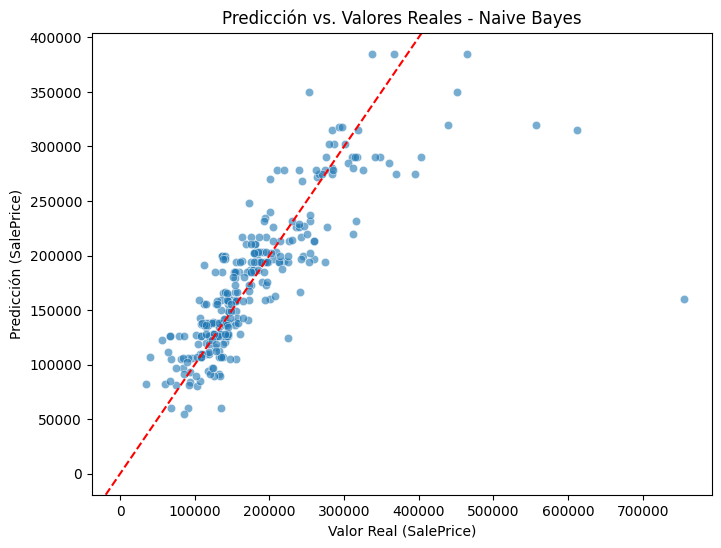

In [10]:
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_nb_reg = GaussianNB()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_nb_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-scores.mean())
print(f"RMSE con Validación Cruzada: {rmse_cv}")

# Inicializar y entrenar el modelo de Naive Bayes (GaussianNB para regresión)
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicción en conjunto de prueba
y_pred = nb.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valor Real (SalePrice)")
plt.ylabel("Predicción (SalePrice)")
plt.title("Predicción vs. Valores Reales - Naive Bayes")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Línea de referencia
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Regresión Lineal": LinearRegression(),
    "Árbol de Regresión": DecisionTreeRegressor(max_depth=6, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
}

rmse_values = {}
r2_values = {}

# Entrenamiento y evaluación de cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_values[name] = rmse
    r2_values[name] = r2

    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R² Score: {r2:.2f}\n")

Naive Bayes:
  RMSE: 53380.67
  R² Score: 0.63

Regresión Lineal:
  RMSE: 39710.99
  R² Score: 0.79

Árbol de Regresión:
  RMSE: 37056.55
  R² Score: 0.82

Random Forest:
  RMSE: 30287.63
  R² Score: 0.88

